# EPIDEMY SIMULATIONS

**LEONARDO LAVAGNA**

## INTRODUCTION

The SIR model is a compartmental model in epidemiology based on three compartments: $S$ the stock of susceptible population, $I$ the stock of infected and $R$ the stock of removed population (either by death or recovery). The transitions between the compartments are governed by some parameters: $\beta$ a characteristic parameter of the infectuous disease studied, and $\gamma$ such that the mean time spent in compartment $I$ is $\frac{1}{\gamma}$. The evolution of the subpopulations in $S$, $I$, $R$ is governed, in an epidemic regime where there are no new borns and deaths not related to the disease, by the following differential equations: $$\begin{cases}\dot{s}=-\beta si\\ \dot{i}= \beta si-\gamma i\\ \dot{r}=\gamma i \end{cases} $$ where the derivatives are taken w.r.t. time and the lower cases letters correspond to the upper cases letters divided by the total size of the population $N=S+I+R$. Given the initial conditions $s(0)=s_0$, $i(0)=i_0$ and $r(0)=r_0$ with $s_0+i_0+r_0=1$ we have a Chaucy problem where $s+i+r$ is constant in time (and constantly equal to 1). Indeed by adding up the previous equations it holds: $\frac{d}{dt}(s+i+r)=0$. Leveraging this property and the fact that the first two SIR equations do not depend on $r$ it can be shown that: 

**Theorem 1<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) .** If $\sigma=\frac{\beta}{\gamma}$ the solution $(s,i,r)$ of the previous Cauchy problem with $s_0>0$, $i_0>0$ and $r_0=0$ is such that

* $s$ is decreasing, and $i$ is decreasing for $t>T$ for some $T\geq 0$, but $r$ is increasing;
* $\lim_{t\to +\infty} s(t)= s_{\infty}$, $\lim_{t\to +\infty} i(t)=0$ and $\lim_{t\to +\infty} r(t)=1-s_{\infty}$ where $s_{\infty}>0$ is a unique root in $(0,\frac{1}{\sigma})$ of the equation $s_{\infty}-\frac{1}{\sigma}\ln(\frac{s_{\infty}}{s_0})-1=0$;
* the function $i$ is decreasing in $[0,\infty)$ when $\sigma\leq 1$ or $\sigma >1$ and $s_0\leq\frac{1}{\sigma}$, moreover if $\sigma >1$ and $s_0>\frac{1}{\sigma}$ it exists $T>0$ such that $i$ is increasing in $[0,T]$ and decreasing in $[T,+\infty)$ and in that case $\max_{\{t\geq 0\}}i(t)=1-\frac{1+\ln(\sigma s_0)}{\sigma}$ represent the diffusion peack of the disease.

The previous result can be useful to predict the qualitative evolution of the disease, moreover it shows the importance of the parameter $\frac{\beta}{\gamma}$ and the strong dependence on the initial values.

In this notebook we will study and simulate some aspects of the SIR model on a network. This approach is alternative to using differential equations. In this case, each node in the network represents a person. The edges between nodes represent social connections over which a disease can be transmitted. In every iteration step neighbors of an infected node are infected with a certain probability, while already infected persons recover with a certain other probability, resembling a percolation model.

<a name="cite_note-1"></a>[[1]](#cite_ref-1) C. Mascia, E. Montefusco, A. Terracina. BioMat 1.0, pp. 141-151. Edizioni LaDotta, 2018.

## PART 1 . Simulation of an epidemic on a given network using an SIR model

In this part we will simulate an epidemic on a graph $g$ using an SIR model. In particular we will see:
* the S,I,R dynamics' plot
* the final epidemic size as $\beta$ changes when $\gamma$ is fixed
* the epidemic threshold 


### Set up

In [1]:
#!pip install EoN

In [2]:
# LIBRARIES

import matplotlib
import EoN
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import auxiliary_functions as AF

In [3]:
# GLOBAL PARAMETERS

#transmission rates
beta  = 0.005
betas = [10*beta,beta/10]

#recovery rate
gamma = 0.025

#times
t0   = 0
tmax = 100

#r0
r0 = beta/gamma
print("Value of r_0:", r0)

#percentage of initial infected
rho = 0.1

Value of r_0: 0.19999999999999998


### Graph creation

In [4]:
# GRAPH

g = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

In [5]:
# CHECK

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


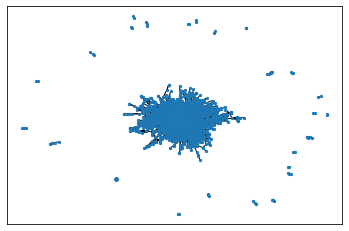

In [6]:
# PLOT
# REMARK . This cell takes a minute ore two to run

spring_pos = nx.spring_layout(g)
nx.draw_networkx(g,pos=spring_pos,with_labels=False,node_size=5)

In [7]:
# CONNECTED COMPONENTS SIZES

ccs = [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]
print("Sizes of connected components: ", np.transpose(ccs))
print("Number of connected components: ", len(np.transpose(ccs)))

Sizes of connected components:  [5275    5    5    5    4    3    3    3    3    3    3    3    3    3
    2    2    2    2    2    2    2    2    2    2    2    2]
Number of connected components:  26


As we can see there are 26 connected components one of which is very large. This network structure will have an influence on the SIR dynamics. We expect that most of the infections will arise in this large connected component, and eventual immunization strategies should take into account this particular node distribution.

### SIR simulation

To carry out a simulation of the SIR model on the graph $g$ previously created we will leverage the library `EoN` and the method `EoN.Gillespie_SIR`. The correspondent official documentation can be found on https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.Gillespie_SIR.html.

In [8]:
# SIMULATION

sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)

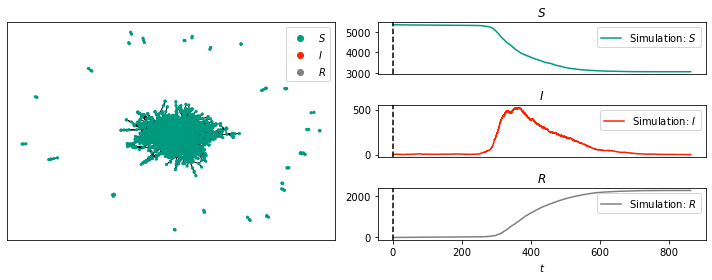

In [9]:
# PLOTS AT TIME t0

sim.display(time=t0,pos=spring_pos,node_size=5)
plt.show()

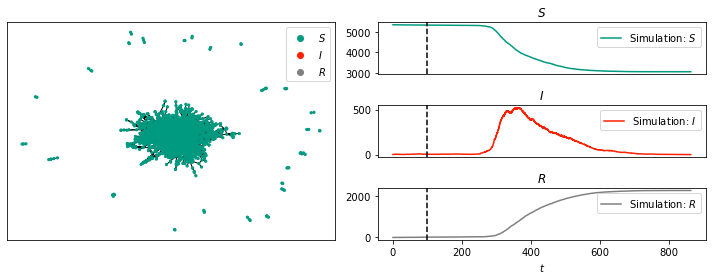

In [10]:
# PLOTS AT TIME tmax

sim.display(time=tmax,pos=spring_pos,node_size=5)
plt.show()

### SIR dynamics

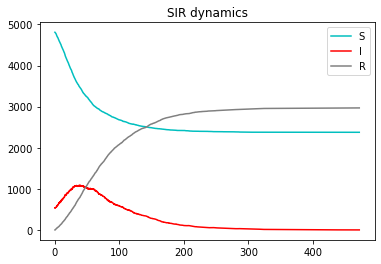

In [11]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t, S, label = "S",color="c")
ax.plot(t, I, label = "I",color="r")
ax.plot(t, R, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [12]:
# EPIDEMIC SIZE

I.argmax()/g.order()

0.3986903648269411

### Analysis of the final epidemic size as beta changes when gamma is fixed 


We will now study the epidemic size as a function of $\beta$ with a fixed value of $\gamma=0.025$. We will choose two significant wales for $\beta$: one for which $\frac{\beta}{\gamma}>1$ and the other such that $\frac{\beta}{\gamma}<1$. We expect that when $\frac{\beta}{\gamma}>1$ there should be an epidemic outbreak.

In [13]:
# SIMULATION IN THE CASE r0>1

t1, S1, I1, R1 = EoN.Gillespie_SIR(g,tau = betas[0], gamma = gamma,rho = rho)

In [14]:
# SIMULATION IN THE CASE r0<1

t2, S2, I2, R2 = EoN.Gillespie_SIR(g,tau = betas[1], gamma = gamma,rho = rho)

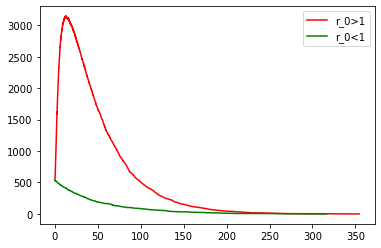

In [15]:
# PLOTS

plt.plot(t1, I1, color='r', label='r_0>1')
plt.plot(t2, I2, color='g', label='r_0<1')
plt.legend()
plt.show()

### Study of the epidemic threshold
We will now consider the epidemic threshold where $\beta=\gamma$ as discussed in 
* Gabriel Fabricius, Alberto Maltz, Exploring the threshold of epidemic spreading for a stochastic SIR model with local and global contacts, Physica A: Statistical Mechanics and its Applications, Volume 540, 2020, 123208, ISSN 0378-4371, https://doi.org/10.1016/j.physa.2019.123208. Available online at https://www.sciencedirect.com/science/article/pii/S0378437119318035.

In [16]:
# SIMULATION

sim_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, return_full_data=True)
t_thr, S_thr, I_thr, R_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, rho=rho)

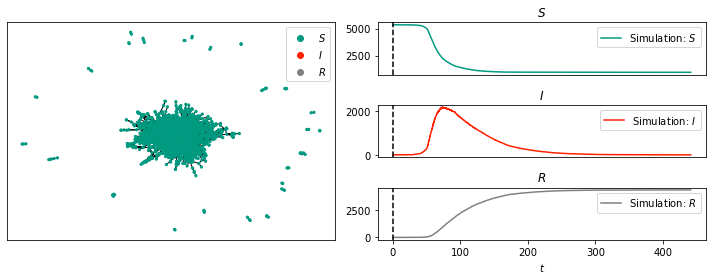

In [17]:
# PLOTS AT TIME t0

sim_thr.display(time=t0, pos=spring_pos,node_size=5)
plt.show()

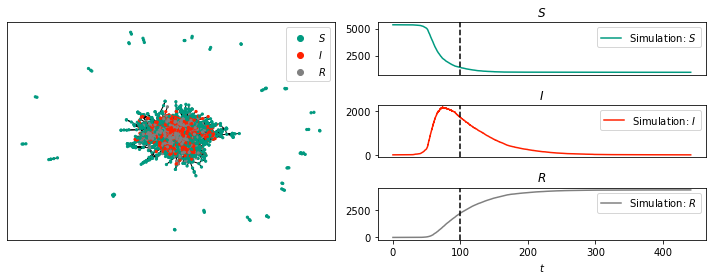

In [18]:
# PLOTS AT TIME tmax

sim_thr.display(time=tmax, pos=spring_pos,node_size=5)
plt.show()

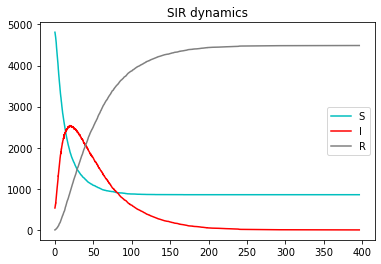

In [19]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_thr, S_thr, label = "S",color="c")
ax.plot(t_thr, I_thr, label = "I",color="r")
ax.plot(t_thr, R_thr, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [20]:
# EPIDEMIC SIZE

I_thr.argmax()/g.order()

0.7131898971000935

## SUPPLEMENT TO PART 1 . Equivalence of EoN.Gillespie_SIR and EoN.fast_SIR
Here we will see that the choice of the method `EoN.Gillespie_SIR` is equivalent `EoN.fast_SIR` as discussed in 
the article available at https://arxiv.org/pdf/2001.02436.pdf.

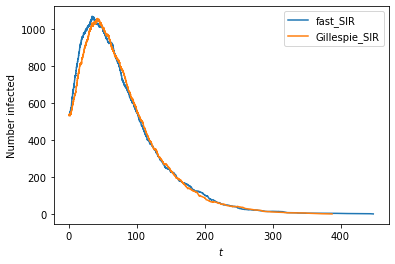

In [21]:
# EQUIVALENCE EoN.Gillespie_SIR AND EoN.fast_SIR

t_f, S_f, I_f, R_f = EoN.fast_SIR(g, tau=beta, gamma=gamma, rho=rho)
t_g, S_g, I_g, R_g = EoN.Gillespie_SIR(g, tau=beta, gamma=gamma, rho=rho)

plt.plot(t_f, I_f, label = 'fast_SIR')
plt.plot(t_g, I_g, label = 'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## PART 2 . Generate a random network by randomly rewiring a variable percentage of edges and repeat Part 1

We will now repeat the tasks carried out in Part 1 in the case of a new randomly generated graph obtained by rewiring of some percentage of edges in the previous graph $g$.

### Graph creation

In [22]:
# PARAMETERS

#percentages of edges to rewire
p = [0.05,0.1,0.3,0.5,0.8]

In [23]:
# EXAMPLE GRAPHS WITH 30% OF EDGES REMOVED

g_s = AF.edge_rewire(g,p[0])

Check.
Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


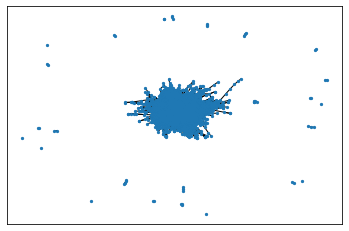

In [24]:
# PLOTS
# REMARK . This cell takes a minute ore two to run

spring_pos_gs = nx.spring_layout(g_s)
nx.draw_networkx(g_s,pos=spring_pos_gs,with_labels=False,node_size=5)
plt.show()

### Repeat Part 1 with the new graph

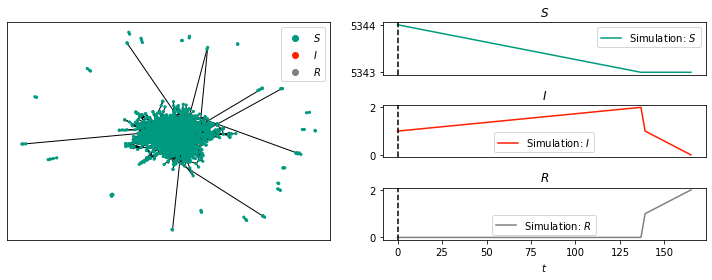

In [25]:
# SIMULATION AND PLOTS AT TIME t0

sim = EoN.Gillespie_SIR(g_s,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)
sim.display(time=t0,pos=spring_pos,node_size=5)
plt.show()

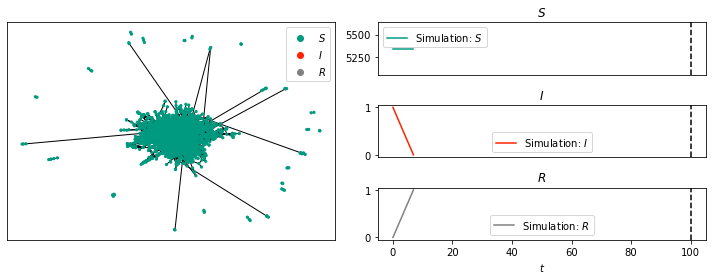

In [26]:
# SIMULATION AND PLOTS AT TIME tmax

sim = EoN.Gillespie_SIR(g_s,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)
sim.display(time=tmax,pos=spring_pos,node_size=5)
plt.show()

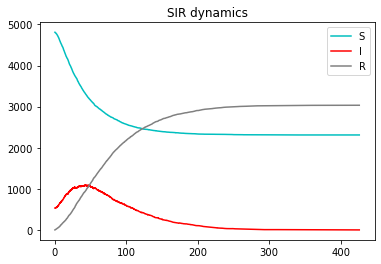

In [27]:
# SIMULATION AND PLOTS OF SIR DYNAMICS

t_s, S_s, I_s, R_s = EoN.Gillespie_SIR(g_s, tau=beta, gamma=gamma, rho=rho)

fig, ax = plt.subplots()
ax.plot(t_s, S_s, label = "S",color="c")
ax.plot(t_s, I_s, label = "I",color="r")
ax.plot(t_s, R_s, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [28]:
# EPIDEMIC SIZE

I_s.argmax()/g_s.order()

0.4583723105706268

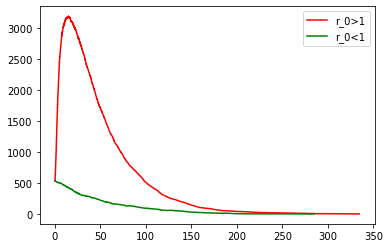

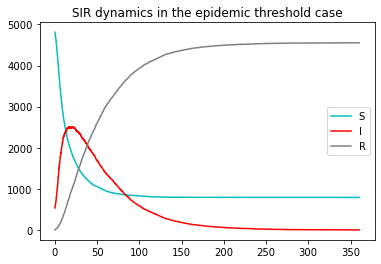

In [29]:
# ANALYSIS OF THE FINAL EPIDEMIC SIZE AS BETA CHANGES WHEN GAMMA IS FIXED 

#Simulation when r0>1
t3, S3, I3, R3 = EoN.Gillespie_SIR(g_s,tau = betas[0], gamma = gamma,rho = rho)

#Simulation when r0>1
t4, S4, I4, R4 = EoN.Gillespie_SIR(g_s,tau = betas[1], gamma = gamma,rho = rho)

#plots of the SIR dynamics
plt.plot(t3, I3, color='r', label='r_0>1')
plt.plot(t4, I4, color='g', label='r_0<1')
plt.legend()
plt.show()

#Simulation in the case of epidemic threshold
t5, S5, I5, R5 = EoN.Gillespie_SIR(g_s,tau=gamma, gamma = gamma,rho = rho)

#plots of the SIR dynamics
fig, ax = plt.subplots()
ax.plot(t5, S5, label = "S",color="c")
ax.plot(t5, I5, label = "I",color="r")
ax.plot(t5, R5, label = "R",color="grey")
plt.title("SIR dynamics in the epidemic threshold case")
plt.legend(loc="best")
plt.show()

## PART 3 . Repeat Part 1 with part of the population immunized

In this section we will work under the assumtion that immunization is possible. To deal with immunization we constructed a SIR model from scratch using a percolation-type approach (see the code in the library `auxiliary_functions`). The main idea behind this approach is to define a list of nodes in the graph that cannot be infected, that is we will reduce the size of the set of susceptibles. I have to tank [Giorgio Giannone](https://georgosgeorgos.github.io/) from whom I gained important insights about this aspect.

**Remark .** In this section and in the following one, we will use custom functions which are based on randomized algorithms. For this reason, sometimes, the output of some cells below will stay flat, meaning that the epidemic model remained stable with values constantly equal to some initial user defined parameters. In such cases re-run the interested cells a couple of times in order for the model simulation to show appropriate non trivial results. 

### Initial immunized choosen at random

In [55]:
# SIMULATION WITHOUT IMMUNIZATION

sir=AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="",frac=0.3)
data=sir.getDataNormalized()

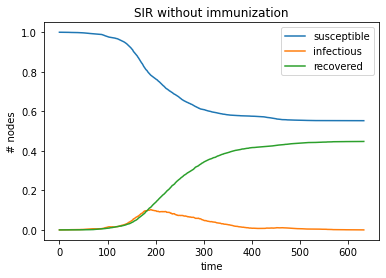

In [56]:
# PLOTS

AF.plot_sir(plt,data, title="SIR without immunization")

In [61]:
# SIMULATION WITH RANDOM IMMUNIZATION

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="random", frac=0.3)
data_immunization=sir.getDataNormalized()

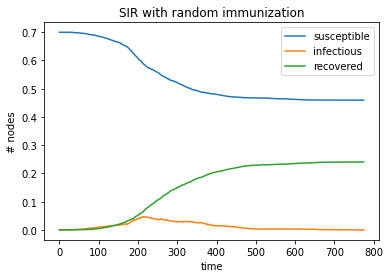

In [62]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with random immunization")

### Initial immunized choosen following the closeness centrality

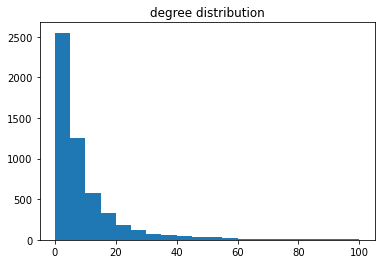

In [34]:
# DEGREE DISTRIBUTION

d=dict(g.degree())
degree=list(d.values())
plt.hist(degree,bins=20, range=(0,100))
plt.title("degree distribution")
plt.show()

In the previous plot we see that most of the nodes have small degree and there are a few with very high degree. This degree distribution will heavily influence the SIR dynamics. In particular if an immunization strategy prioritize the nodes with higher degree we expect that the situation will remain stable.

In [63]:
# SIMULATION WITH CLOSENESS IMMUNIZATION
# REMARK . This cell takes a minute ore two to run

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="degree", frac=0.3)
data_immunization=sir.getDataNormalized()

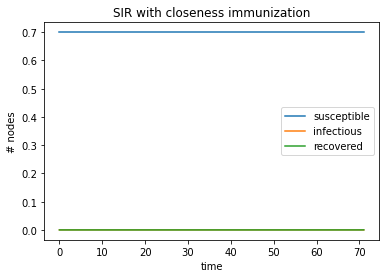

In [64]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with closeness immunization")

As expected in the previous plot the situation remained stable (even when considering the randomness of the algorithm). Since, by inspection of the degree distribution, there are less then $1\%$ of nodes with very high degree, we expect that if a very small fraction of the population is immunized following the closeness centrality, then the SIR dynamics will not remain stable. 

In [37]:
# SIMULATION WITH CLOSENESS IMMUNIZATION
# REMARK . This cell takes a minute ore two to run

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="degree", frac=0.0003)
data_immunization=sir.getDataNormalized()

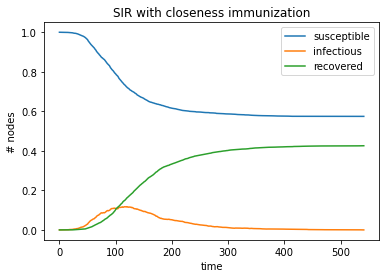

In [38]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with closeness immunization")

## PART 4. Assign the recovery rate to each individual from a probability distribution and repeat Part 1.

We will now consider the case where the recovery rate is not constant, but it is drawn from a uniform distribution, a gaussian and a power distribution with power 2.

In [65]:
# SIMULATION WITH STANDARD UNIFORM RECOVERY

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="uniform")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()

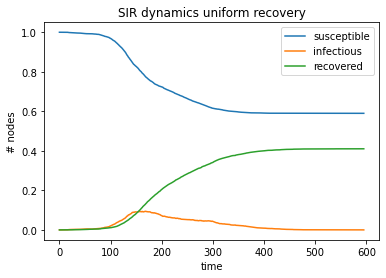

In [66]:
# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics uniform recovery")

In [79]:
# SIMULATION WITH STANDARD GAUSSIAN RECOVERY

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="gaussian")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()

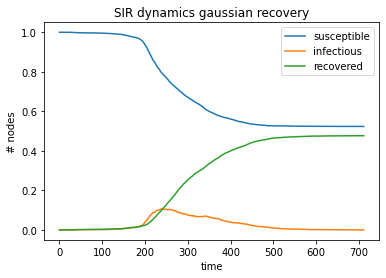

In [80]:
# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics gaussian recovery")

In [85]:
# SIMULATION WITH POWER LAW RECOVERY WITH DEFAULT POWER a=2

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="power")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()

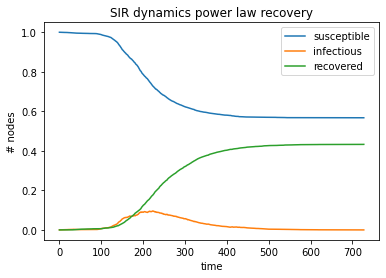

In [86]:
# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics power law recovery")

## PART 5. Model's changes when the available vaccine has a diminishing efficacy over time

If we suppose that the immunization is not permanent, we will try to model the situation in the following way: there are 4 compartments $S,I,R,E$ where $S,I,R$ are as before and $E$ are the exposed. A person is exposed when either has been infected and recovered or has been vaccinated. The transition $R\to E$ is governed by a parameter $1-\mu$ where $\mu$ is the mortality rate of the disease. Once $e\in E$ the transition $e\in I$ happens with probability $1-\epsilon(t)$ with $t\to \epsilon(t)$ the function that describes the immunization loose of efficacy over time. To model this situation we will adapt some of the auxiliary functions from before.

In [45]:
# SIMULATION WITH LINEAR IMMUNIZATION LOOSE OF EFFICACY t --> epsilon(t) = 0.5*t*epsilon AT TIME t0
# AND 30% OF THE POPULATION THAT HAS BEEN INITIALLY VACCINATED

sire = AF.SIRE(graph=g,time=t0,beta=beta,gamma=gamma,mu=0.1,epsilon=0.3)
sire.run(frac=0.3)
data=sire.getDataNormalized()

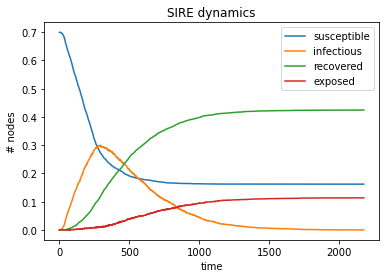

In [46]:
# PLOTS

AF.plot_sire(plt, data, title="SIRE dynamics")

In [127]:
# SIMULATION WITH LINEAR IMMUNIZATION LOOSE OF EFFICACY t --> epsilon(t) = 0.5*t*epsilon AT TIME tmax
# AND 30% OF THE POPULATION THAT HAS BEEN INITIALLY VACCINATED

sire = AF.SIRE(graph=g,time=tmax,beta=beta,gamma=gamma,mu=0.1,epsilon=0.3)
sire.run(frac=0.3)
data=sire.getDataNormalized()

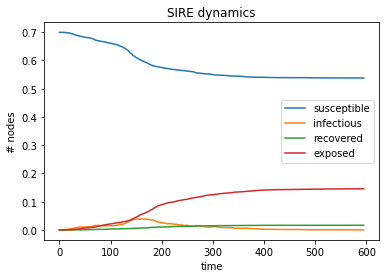

In [128]:
# PLOTS

AF.plot_sire(plt, data, title="SIRE dynamics")

We expect that the previous dynamics will be highly influenced by the choiche of the parameter $\mu$, and this can be confirmed by carrying out simulations with $\mu$ variable and $\epsilon$ fixed. Moreover we choosed a linear decreasing function for the transition $E\to I$ of the form $1-\frac{1}{2}t\epsilon$, which seemed reasonable, but it can be the case that the loss in immunization efficiency decreases more rapidly. Also the hypothesis that the probability of reinfection is the same either one has been vaccinated or it has contracted the disease is somewhat arbitrary, but it seemed coherent with the concept of immunization. In conclusion, we will not try to go behiond this point since the topic involve some difficult challenges that shall merit a more focused study.